In [48]:
# Importing all the required libraries.
import pandas as pd
import numpy as np


In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YASH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YASH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Importing the VAERS report dataset.
df1 = pd.read_csv("..//Datasets//2021VAERSData.csv", encoding='latin1')

# Removing columns with 90% NaN values.
df1.drop(["RPT_DATE", "V_FUNDBY", "CAGE_MO", "BIRTH_DEFECT", "RECVDATE", "TODAYS_DATE", "SPLTTYPE", "SYMPTOM_TEXT"], axis=1, inplace=True)

# Mean imputation on numerical columns.
df1['AGE_YRS'].fillna(round(df1['AGE_YRS'].mean()), inplace = True)
df1['CAGE_YR'].fillna(round(df1['CAGE_YR'].mean()), inplace = True)
df1['HOSPDAYS'] = df1.apply(
    lambda row: 0 if pd.isna(row['HOSPITAL']) else row['HOSPDAYS'],
    axis = 1
)

df1['HOSPDAYS'].fillna(round(df1['HOSPDAYS'].mean()), inplace = True)
df1['NUMDAYS'].fillna(round(df1['NUMDAYS'].mean()), inplace = True)

# Filling categorical columns with mode.
df1.fillna(df1.mode().iloc[0], inplace = True)
df1

,VAERS_ID,STATE,AGE_YRS,CAGE_YR,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,LAB_DATA,V_ADMINBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,FORM_VERS,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,TX,33.0,33.0,F,Y,02/01/2021,Y,Y,Y,...,None,PVT,None,None,None,Flu,2,Y,Y,Pcn and bee venom
1,916601,CA,73.0,73.0,F,Y,02/01/2021,Y,Y,Y,...,None,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Flu,2,Y,Y,"""Dairy"""
2,916602,WA,23.0,23.0,F,Y,02/01/2021,Y,Y,Y,...,None,SEN,None,None,None,Flu,2,Y,Y,Shellfish
3,916603,WA,58.0,58.0,F,Y,02/01/2021,Y,Y,Y,...,none,WRK,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",2,Y,Y,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,TX,47.0,47.0,F,Y,02/01/2021,Y,Y,Y,...,None,PUB,Na,Na,None,Flu,2,Y,Y,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27950,1092595,TX,70.0,70.0,F,Y,02/01/2021,Y,Y,Y,...,None,PVT,None,None,None,Flu,2,Y,Y,NKA
27951,1092651,CA,77.0,77.0,M,Y,02/27/2021,Y,Y,Y,...,None,PHM,"HTN, DM, Cholesterol and blood thinners",+Covid in January 2021,Cardiac,Flu,2,Y,Y,None
27952,1092653,CA,88.0,88.0,F,Y,03/10/2021,Y,Y,Y,...,Patient expired.,SEN,"Vitamin B12,C,D3. Eyedrops, probiotics","Bladder cancer, Malignant melanoma, both in re...","Interstitial cystitis, mitral valve prolapse, ...",Flu,2,Y,Y,robitussin
27953,1092737,ME,69.0,69.0,M,Y,03/11/2021,Y,Y,Y,...,Ambulance personnel pronounced dead at scene,PHM,Levothyroxine Insulin Diabetes meds,None,"Diabetes, coronary artery disease, hypothyroidism",Flu,2,Y,Y,None known


In [52]:
# Importing the VAERS sympotoms and vaccine datasets.
df2 = pd.read_csv("..//Datasets//2021VAERSSYMPTOMS.csv", encoding='latin1')
df3 = pd.read_csv("..//Datasets//2021VAERSVAX.csv", encoding='latin1')

# Pre-processing both the datasets.
df2 = df2.dropna(axis = 0)
df2.drop(["SYMPTOMVERSION1", "SYMPTOMVERSION2", "SYMPTOMVERSION3", "SYMPTOMVERSION4", "SYMPTOMVERSION5"], axis=1, 
         inplace=True)

df3.drop(["VAX_LOT", "VAX_SITE"], axis=1, inplace=True)
df3.fillna(df3.mode().iloc[0], inplace = True)

In [53]:
df2

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
10,916611,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite
11,916611,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache
12,916611,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain
13,916611,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia
17,916615,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy
...,...,...,...,...,...,...
39527,1091269,COVID-19,COVID-19 pneumonia,Cerebrovascular accident,Death,Mechanical ventilation
39531,1091439,Cerebral haemorrhage,Computerised tomogram abnormal,Death,Dementia,Fall
39534,1091560,Balance disorder,Blood test,Craniotomy,Fall,Haemoglobin decreased
39548,1092483,Death,Dyspnoea,Fatigue,Headache,Respiration abnormal


In [54]:
df3

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME
0,916600,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,UNK,IM,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...
28337,1092595,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
28338,1092651,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
28339,1092653,COVID19,MODERNA,2,SYR,COVID19 (COVID19 (MODERNA))
28340,1092737,COVID19,MODERNA,1,UN,COVID19 (COVID19 (MODERNA))


In [60]:
# Making the final patient dataset.
# Would be used to predict the medical needs of a particular patient.
df4 = pd.concat([df1, df2, df3], axis=1, join="inner")

# Some pre-processing.
#df4.drop(df4.columns[28], axis=1, inplace=True)
df4.reset_index(inplace = True)
#df4['SYMPTOM_TEXT'] = df4['SYMPTOM_TEXT'].str.replace("[^a-zA-Z#]"," ")

In [61]:
'''# Removing stop words and tokenizing the text for SYMPTOM_TEXT column.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df4['SYMPTOM_TEXT'] = df4['SYMPTOM_TEXT'].astype(str)
s = df4['SYMPTOM_TEXT']
stop_words = stopwords.words('english')
filtered_reviews = []

for text in s:
    word_tokens = word_tokenize(text)
    word_tokens
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_reviews.append(filtered_sentence)
    
filtered_reviews'''

"# Removing stop words and tokenizing the text for SYMPTOM_TEXT column.\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\n\ndf4['SYMPTOM_TEXT'] = df4['SYMPTOM_TEXT'].astype(str)\ns = df4['SYMPTOM_TEXT']\nstop_words = stopwords.words('english')\nfiltered_reviews = []\n\nfor text in s:\n    word_tokens = word_tokenize(text)\n    word_tokens\n    filtered_sentence = [w for w in word_tokens if not w in stop_words]\n    filtered_reviews.append(filtered_sentence)\n    \nfiltered_reviews"

In [62]:
'''# Finding the stems of the SYMPTOM_TEXT column.
from nltk import PorterStemmer

ps=PorterStemmer()
stemmed_reviews=[]

for text in filtered_reviews:
    L=[]
    for w in text:
        L.append(ps.stem(w))
    stemmed_reviews.append(L)
    
stemmed_reviews'''

'# Finding the stems of the SYMPTOM_TEXT column.\nfrom nltk import PorterStemmer\n\nps=PorterStemmer()\nstemmed_reviews=[]\n\nfor text in filtered_reviews:\n    L=[]\n    for w in text:\n        L.append(ps.stem(w))\n    stemmed_reviews.append(L)\n    \nstemmed_reviews'

In [63]:
'''# Creating a column of cleaned reviews and reappending it to the dataframe.
clean=[]
for text in stemmed_reviews:
    st=""
    for w in text:
        st=st+w+" "
    clean.append(st)

df4['SYMPTOM_TEXT'] = [rev for rev in clean]'''

'# Creating a column of cleaned reviews and reappending it to the dataframe.\nclean=[]\nfor text in stemmed_reviews:\n    st=""\n    for w in text:\n        st=st+w+" "\n    clean.append(st)\n\ndf4[\'SYMPTOM_TEXT\'] = [rev for rev in clean]'

In [64]:
df4

,index,VAERS_ID,STATE,AGE_YRS,CAGE_YR,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,...,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME
0,10,916611,NC,33.0,33.0,F,Y,02/01/2021,Y,Y,...,Chest pain,Chills,Confusional state,Decreased appetite,916611,COVID19,MODERNA,1,SYR,COVID19 (COVID19 (MODERNA))
1,11,916613,CA,40.0,40.0,F,Y,02/01/2021,Y,Y,...,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,COVID19,MODERNA,1,SYR,COVID19 (COVID19 (MODERNA))
2,12,916614,NY,29.0,29.0,F,Y,02/01/2021,Y,Y,...,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
3,13,916615,NY,38.0,38.0,F,Y,02/01/2021,Y,Y,...,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
4,17,916620,NJ,65.0,65.0,M,Y,02/01/2021,Y,Y,...,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,66.0,M,Y,03/05/2021,Y,Y,...,Hypotension,Malaise,Nausea,Pain in extremity,1080851,COVID19,MODERNA,2,IM,COVID19 (COVID19 (MODERNA))
10773,27948,1092483,IA,67.0,67.0,F,Y,03/11/2021,Y,Y,...,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,COVID19,PFIZER\BIONTECH,2,SYR,COVID19 (COVID19 (PFIZER-BIONTECH))
10774,27950,1092595,TX,70.0,70.0,F,Y,02/01/2021,Y,Y,...,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
10775,27952,1092653,CA,88.0,88.0,F,Y,03/10/2021,Y,Y,...,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,COVID19,MODERNA,2,IM,COVID19 (COVID19 (MODERNA))


In [65]:
df4.drop(["DIED","VAX_TYPE","VAX_NAME","VAX_ROUTE","CAGE_YR"], axis=1, inplace=True)

In [66]:
df4

,index,VAERS_ID,STATE,AGE_YRS,SEX,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,ALLERGIES,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_MANU,VAX_DOSE_SERIES
0,10,916611,NC,33.0,F,02/01/2021,Y,Y,Y,0.0,...,Dust mites Zoloft Wellbutrin Buspar,916611,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,916611,MODERNA,1
1,11,916613,CA,40.0,F,02/01/2021,Y,Y,Y,0.0,...,None,916611,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,MODERNA,1
2,12,916614,NY,29.0,F,02/01/2021,Y,Y,Y,0.0,...,None,916611,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,MODERNA,1
3,13,916615,NY,38.0,F,02/01/2021,Y,Y,Y,0.0,...,"Sulfa, steri strips, adhesive bandages",916611,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,MODERNA,1
4,17,916620,NJ,65.0,M,02/01/2021,Y,Y,Y,0.0,...,None,916615,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,MODERNA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,M,03/05/2021,Y,Y,Y,0.0,...,Losartan Simvastatin Amlodipine,1037873,Hyperhidrosis,Hypotension,Malaise,Nausea,Pain in extremity,1080851,MODERNA,2
10773,27948,1092483,IA,67.0,F,03/11/2021,Y,Y,Y,0.0,...,"Combivent, gabapentin, tramadol.",1037874,Cardiac flutter,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,PFIZER\BIONTECH,2
10774,27950,1092595,TX,70.0,F,02/01/2021,Y,Y,Y,0.0,...,NKA,1037875,Balance disorder,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,MODERNA,1
10775,27952,1092653,CA,88.0,F,03/10/2021,Y,Y,Y,0.0,...,robitussin,1037877,COVID-19,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,MODERNA,2


In [67]:
df4.columns

Index(['index', 'VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'FORM_VERS',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAERS_ID', 'SYMPTOM1',
       'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAERS_ID', 'VAX_MANU',
       'VAX_DOSE_SERIES'],
      dtype='object')

In [68]:
#df4['VAX_TYPE']

In [69]:
# Importing the supply chain dataset.
df5 = pd.read_csv("..//Datasets//SCMS_Delivery_History_Dataset.csv")

In [70]:
df5

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [78]:
#X = df4[['SEX', 'SYMPTOM_TEXT', 'CUR_ILL', 'PRIOR_VAX', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE', 'VAX_NAME']].copy()
X = df4[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].copy()
#X = df4[['SEX']].copy()
Y = df4[['OTHER_MEDS']].copy()

In [79]:
X['Mixed'] = X[X.columns[0:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X['Mixed'])
'''from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X['Mixed'])
#y = df[['Tagged']'''
X

<10777x1905 sparse matrix of type '<class 'numpy.float64'>'
	with 88496 stored elements in Compressed Sparse Row format>

In [80]:
import scipy.sparse
X=pd.DataFrame.sparse.from_spmatrix(X)

In [81]:
X

,0,1,2,3,4,5,6,7,8,9,...,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.356371,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10773,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10774,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10775,0.291465,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
'''from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 80% training and 20% test.'''

'from sklearn.model_selection import train_test_split\n\n# Split dataset into training set and test set\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 80% training and 20% test.'

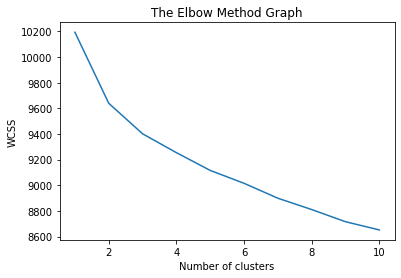

In [85]:
# Using the elbow method to get the optimum number of clusters.

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [87]:
# Perform K-Means Clustering of the data & predict the clusters.

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
#temp = set(y_kmeans.tolist())
#temp

temp = dict()

for i in y_kmeans.tolist():
    temp[i] = 0
    
for i in y_kmeans.tolist():
    temp[i] += 1
    
print(temp)

{0: 6706, 2: 2474, 1: 1597}


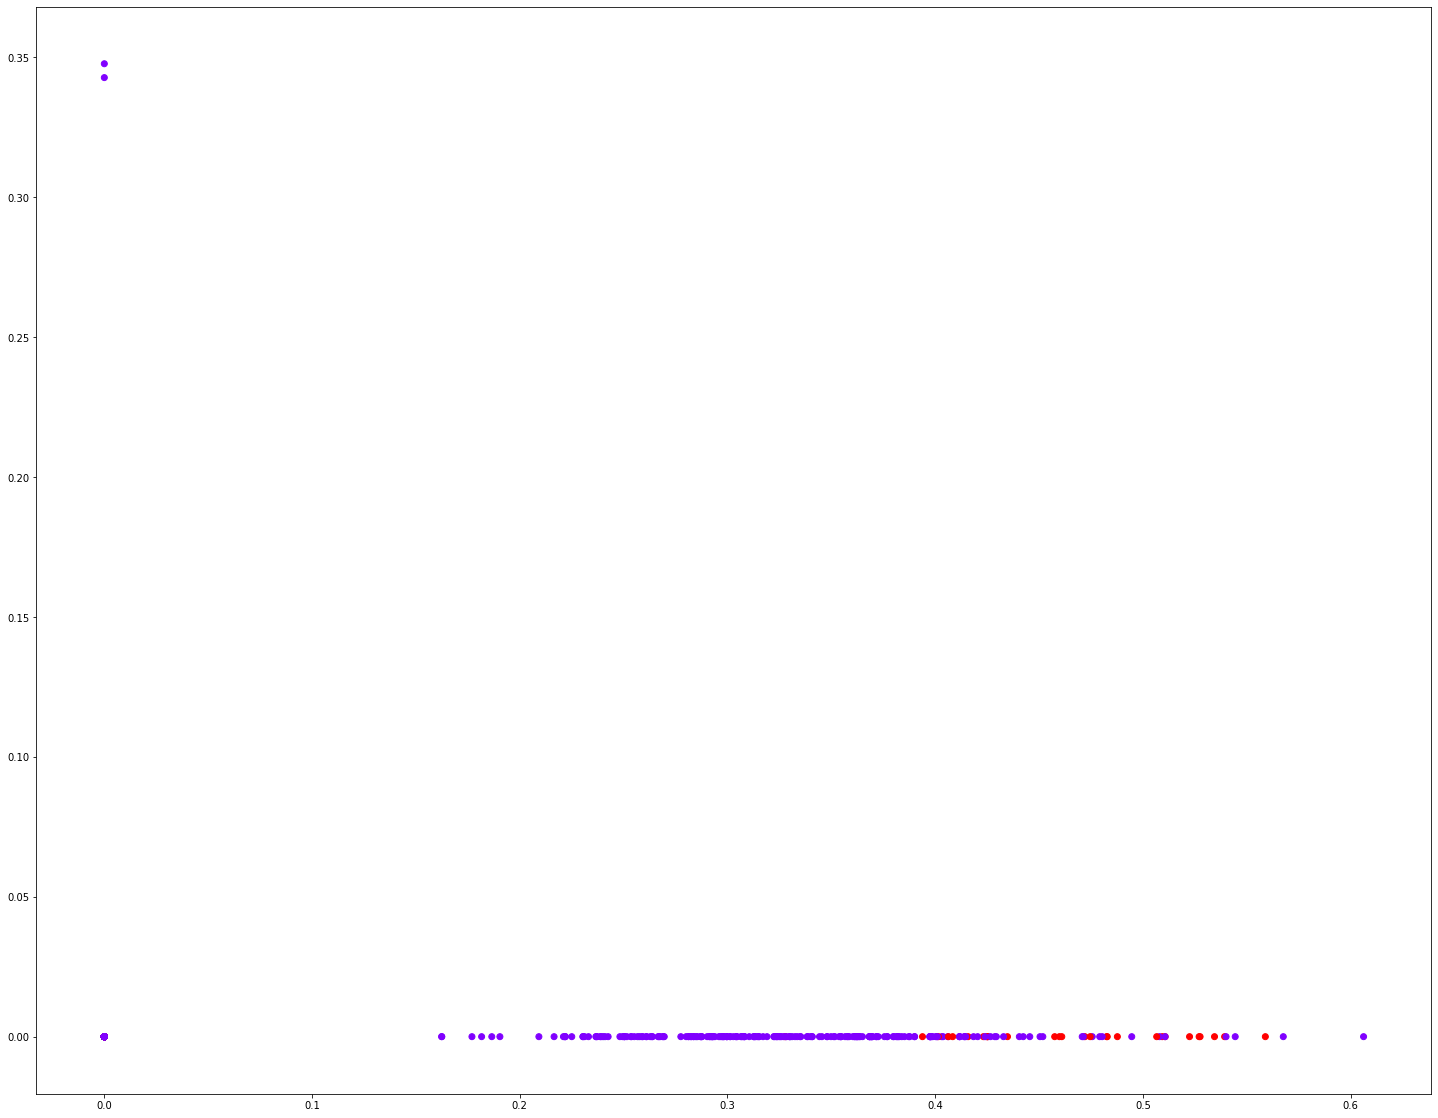

In [92]:
plt.figure(figsize=(25, 20))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.show()

In [93]:
df4['Cluster'] = y_kmeans.tolist()

df4

,index,VAERS_ID,STATE,AGE_YRS,SEX,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_MANU,VAX_DOSE_SERIES,Cluster
0,10,916611,NC,33.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,916611,MODERNA,1,0
1,11,916613,CA,40.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,MODERNA,1,0
2,12,916614,NY,29.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,MODERNA,1,0
3,13,916615,NY,38.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,MODERNA,1,2
4,17,916620,NJ,65.0,M,02/01/2021,Y,Y,Y,0.0,...,916615,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,MODERNA,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,M,03/05/2021,Y,Y,Y,0.0,...,1037873,Hyperhidrosis,Hypotension,Malaise,Nausea,Pain in extremity,1080851,MODERNA,2,2
10773,27948,1092483,IA,67.0,F,03/11/2021,Y,Y,Y,0.0,...,1037874,Cardiac flutter,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,PFIZER\BIONTECH,2,0
10774,27950,1092595,TX,70.0,F,02/01/2021,Y,Y,Y,0.0,...,1037875,Balance disorder,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,MODERNA,1,0
10775,27952,1092653,CA,88.0,F,03/10/2021,Y,Y,Y,0.0,...,1037877,COVID-19,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,MODERNA,2,0


In [96]:
l=[]

for i in df4['OTHER_MEDS']:
    if(',' in i):
        temp=i.split(',')
        
        for j in range(len(temp)):
            temp[j]=temp[j].strip()
        
        l.extend(temp)
    elif(' ' not in i):
        l.append(i.strip())
        
l=list(set(l))

import random
meds=[random.choice(l) for i in range(len(df4))]
df4['meds']=meds
df4

,index,VAERS_ID,STATE,AGE_YRS,SEX,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_MANU,VAX_DOSE_SERIES,Cluster,meds
0,10,916611,NC,33.0,F,02/01/2021,Y,Y,Y,0.0,...,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,916611,MODERNA,1,0,LEVEMIR
1,11,916613,CA,40.0,F,02/01/2021,Y,Y,Y,0.0,...,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,MODERNA,1,0,Hydroxyurea 500 mg
2,12,916614,NY,29.0,F,02/01/2021,Y,Y,Y,0.0,...,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,MODERNA,1,0,vicodin prn
3,13,916615,NY,38.0,F,02/01/2021,Y,Y,Y,0.0,...,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,MODERNA,1,2,Oxycodone
4,17,916620,NJ,65.0,M,02/01/2021,Y,Y,Y,0.0,...,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,MODERNA,1,1,not an adverse reaction)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,M,03/05/2021,Y,Y,Y,0.0,...,Hyperhidrosis,Hypotension,Malaise,Nausea,Pain in extremity,1080851,MODERNA,2,2,TRAMADOL
10773,27948,1092483,IA,67.0,F,03/11/2021,Y,Y,Y,0.0,...,Cardiac flutter,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,PFIZER\BIONTECH,2,0,Effexor xr 75 mg
10774,27950,1092595,TX,70.0,F,02/01/2021,Y,Y,Y,0.0,...,Balance disorder,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,MODERNA,1,0,gabapentin 300mg BID
10775,27952,1092653,CA,88.0,F,03/10/2021,Y,Y,Y,0.0,...,COVID-19,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,MODERNA,2,0,vit-d


In [98]:
# Taking user medicine input.
inp = X.iloc[0, :]



In [106]:
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm

k = 3

neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X, y_kmeans.tolist())

#print(neigh.predict([inp]))

distances, indices = neigh.kneighbors([inp])

#print(distances)
print(indices)

[[0.         0.74153262 0.74177515]]
[[   0 7875 7642]]


In [107]:
type(indices)

numpy.ndarray

In [114]:
for i in indices.ravel():
    print(df4.iloc[i, :], '\n\n')

index                                                             10
VAERS_ID                                                      916611
STATE                                                             NC
AGE_YRS                                                           33
SEX                                                                F
DATEDIED                                                  02/01/2021
L_THREAT                                                           Y
ER_VISIT                                                           Y
HOSPITAL                                                           Y
HOSPDAYS                                                           0
X_STAY                                                             Y
DISABLE                                                            Y
RECOVD                                                             N
VAX_DATE                                                  12/29/2020
ONSET_DATE                        

In [115]:
df5

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [121]:
import random

meds = [random.choice(l) for i in range(len(df5))]
df5['Item Description'] = meds

'''a = set(df4['meds'])
b = set(df5['Item Description'])

print(a.intersection(b))'''

"a = set(df4['meds'])\nb = set(df5['Item Description'])\n\nprint(a.intersection(b))"